In [13]:
import os
from tools import FileTools as ft
import RetinotopicMapping as rm
import skimage.external.tifffile as tf
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
import scipy.ndimage as ni
%matplotlib inline

In [14]:
example_folder = r'Z:\users\drinnenb\IntrinsicImaging\ISI\M208\04-May-2021'
os.chdir(example_folder)

In [15]:
maps=sio.loadmat('isi_maps.mat')

(1082, 1312)


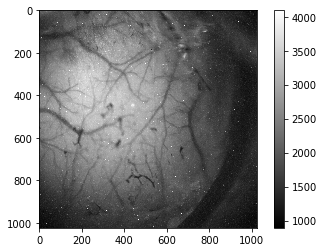

In [16]:
vasculature_map = tf.imread('vessels.tif')
print(vasculature_map.shape)
vasculature_map = vasculature_map[29:-29,144:-144]
_ = plt.imshow(vasculature_map, cmap='gray', interpolation='nearest')
_ = plt.colorbar()
plt.show()

In [17]:
def scale(x, out_range=(-1, 1), axis=None):
    domain = np.min(x, axis), np.max(x, axis)
    y = (x - (domain[1] + domain[0]) / 2) / (domain[1] - domain[0])
    return y * (out_range[1] - out_range[0]) + (out_range[1] + out_range[0]) / 2

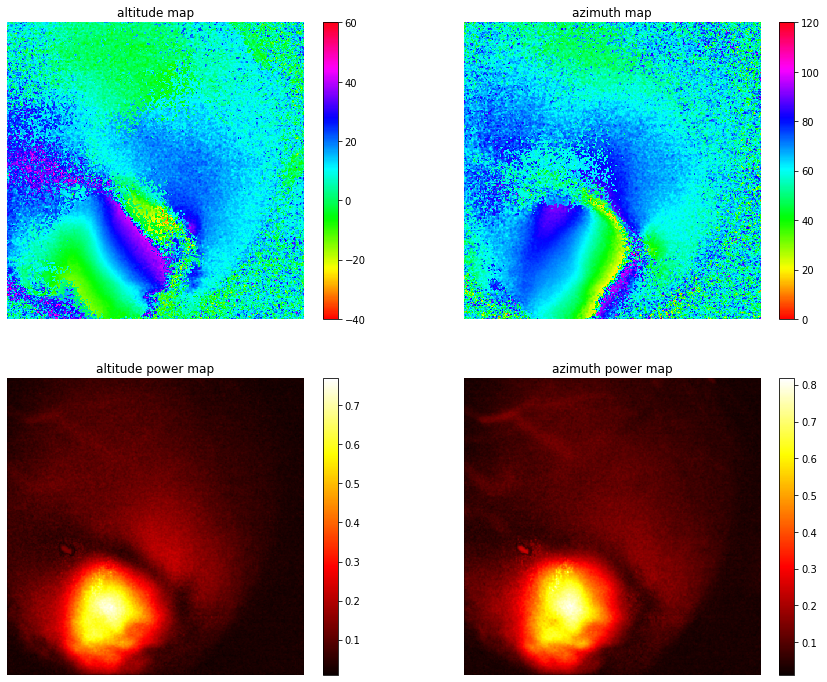

In [18]:
altitude_map = scale(maps['azimuth_map'],out_range=(-40, 60))
azimuth_map = scale(maps['elevation_map'],out_range=(0, 120))
altitude_power_map = maps['power_elevation']
azimuth_power_map = maps['power_azimuth']

f = plt.figure(figsize=(15, 12))
ax1 = f.add_subplot(221)
fig1 = ax1.imshow(altitude_map, vmin=-40, vmax=60, cmap='hsv', interpolation='nearest')
ax1.set_axis_off()
ax1.set_title('altitude map')
_ = f.colorbar(fig1)

ax2 = f.add_subplot(222)
fig2 = ax2.imshow(azimuth_map, vmin=0, vmax=120, cmap='hsv', interpolation='nearest')
ax2.set_axis_off()
ax2.set_title('azimuth map')
_ = f.colorbar(fig2)

ax3 = f.add_subplot(223)
fig3 = ax3.imshow(altitude_power_map, cmap='hot', interpolation='nearest')
ax3.set_axis_off()
ax3.set_title('altitude power map')
_ = f.colorbar(fig3)

ax4 = f.add_subplot(224)
fig4 = ax4.imshow(azimuth_power_map, cmap='hot', interpolation='nearest')
ax4.set_axis_off()
ax4.set_title('azimuth power map')
_ = f.colorbar(fig4)

In [19]:
params = {
          'phaseMapFilterSigma': 3.0, #0.5 w
          'signMapFilterSigma':8., #8. w
          'signMapThr': 0.3, #0.4 w
          'eccMapFilterSigma': 15.0,
          'splitLocalMinCutStep': 5.,
          'closeIter': 3,
          'openIter': 3,
          'dilationIter': 15,
          'borderWidth': 1,
          'smallPatchThr': 1000,#100 w
          'visualSpacePixelSize': 0.5,
          'visualSpaceCloseIter': 15,
          'splitOverlapThr': 1.1,
          'mergeOverlapThr': 0.1
          }

In [20]:
trial = rm.RetinotopicMappingTrial(altPosMap=altitude_map,
                                   aziPosMap=azimuth_map,
                                   altPowerMap=altitude_power_map,
                                   aziPowerMap=azimuth_power_map,
                                   vasculatureMap=vasculature_map,
                                   mouseID='test',
                                   dateRecorded='160612',
                                   comments='This is an example.',
                                   params=params)

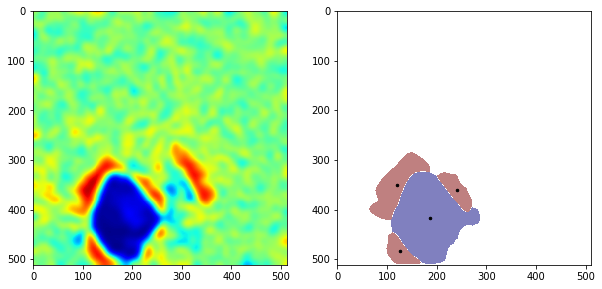

In [21]:
_ = trial._getSignMap(isPlot=False)
#f = plt.figure(figsize=(10, 10))
f,axes=plt.subplots(1,2,figsize=(10,10))
axes[0].imshow(trial.signMapf,vmin=-1, vmax=1, cmap='jet', interpolation='nearest')
rm.plotPatches(trial._getRawPatches(),plotaxis=axes[1])
plt.show()


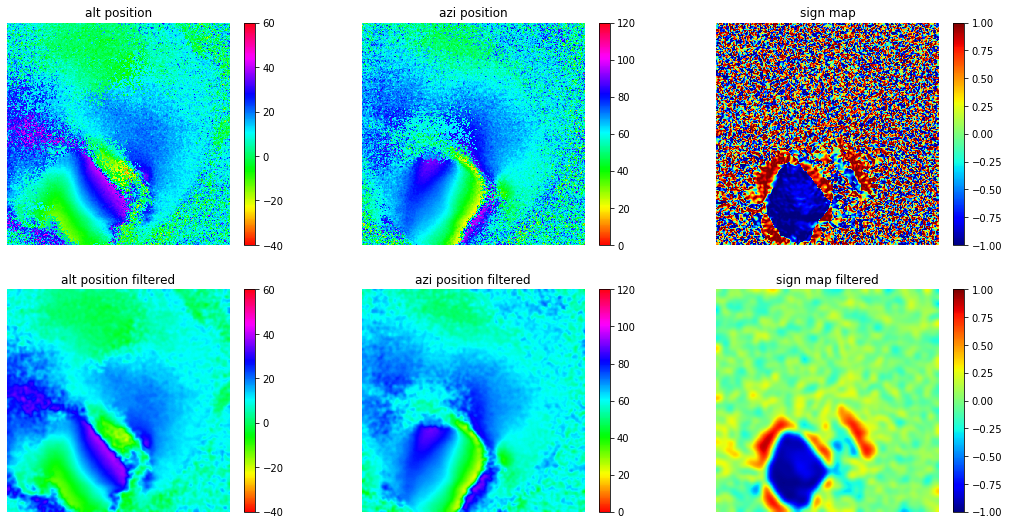

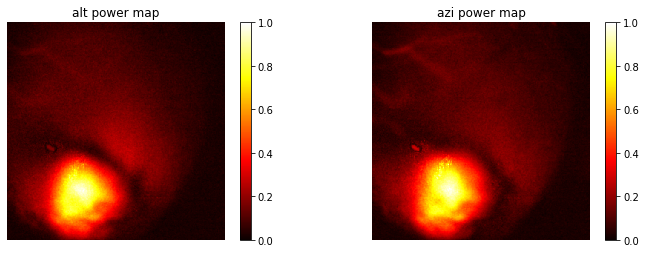

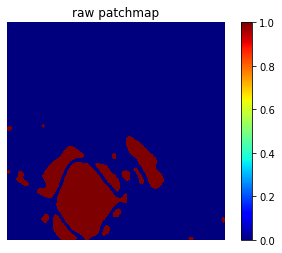

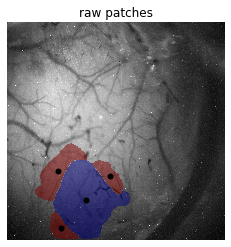

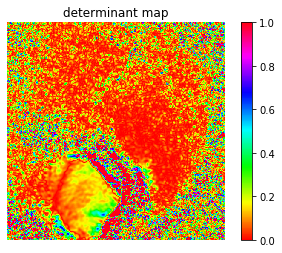

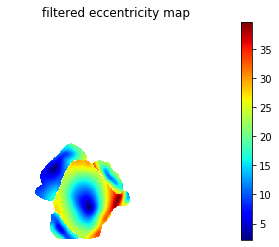

patch01AU=2809.75 AS=4329.518 ratio=1.5408908502202152
2 local minuma were found!!!


C:\code\retinotopic_mapping\retinotopic_mapping\RetinotopicMapping.py:397: RuntimeWarning: invalid value encountered in less_equal
  marker[eccMap2 <= (currThr)] = 1


patch02AU=898.25 AS=965.6964 ratio=1.0750864582608544
patch03AU=2109.0 AS=2265.645 ratio=1.074274546956496
patch04AU=685.5 AS=693.97766 ratio=1.012367120543855


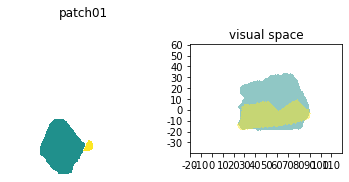

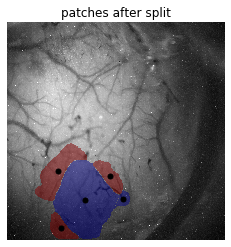

merge iteration: 1


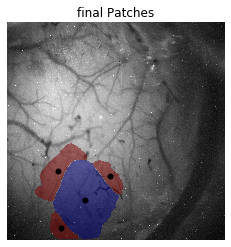

In [22]:
trial.processTrial(isPlot=True) # whole pipeline

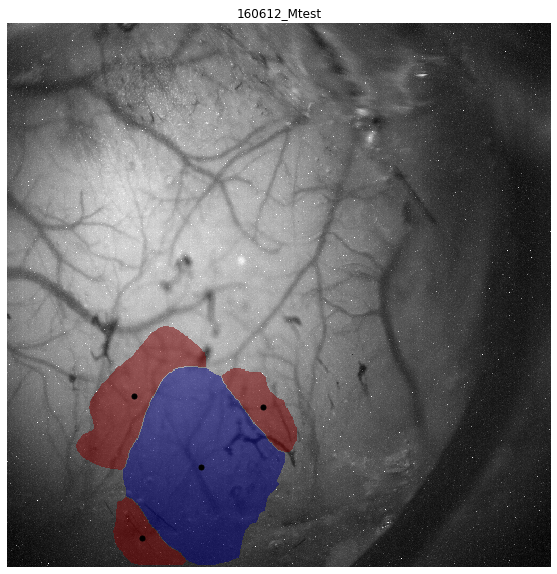

In [23]:
trial.plotFinalPatches()

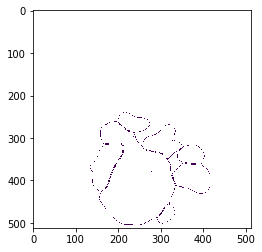

In [45]:
patches = trial.finalPatches
maps = np.zeros((512,512))
borders = np.full((512,512),np.nan)
for i,e in enumerate(patches.keys()):
    this_patch=patches[e]
    maps[this_patch.array==1]=i
    this_border=this_patch.getBorder(borderWidth = 1)
    borders[this_border==1]=1
    
plt.imshow(borders)    

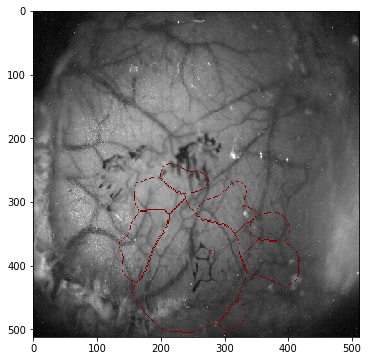

In [46]:
f = plt.figure(figsize=(6, 6))
plotAxis = f.add_subplot(111)
plotAxis.imshow(ni.zoom(trial.vasculatureMap,0.5), cmap='gray', interpolation='nearest')
plotAxis.imshow(borders, vmax=1, vmin=-1, interpolation='nearest', alpha=1, cmap='jet')

In [18]:
var_dict = {"borders":borders}
sio.savemat('borders.mat',var_dict)